## Load data




In [ ]:
import zipfile

zip_file_path = '/content/bank+marketing.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zf:
    print(zf.namelist())

['bank.zip', 'bank-additional.zip']


**Reasoning**:
The previous attempt to list files in the zip file showed that the zip file contains two other zip files, not the CSV directly. I need to open 'bank-additional.zip' and then extract the CSV file from there.



In [ ]:
import pandas as pd
import zipfile

zip_file_path = '/content/bank+marketing.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zf:
    with zf.open('bank-additional.zip', 'r') as zf2:
        with zipfile.ZipFile(zf2, 'r') as zf3:
            with zf3.open('bank-additional/bank-additional-full.csv') as f:
                df = pd.read_csv(f, sep=';')

display(df.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


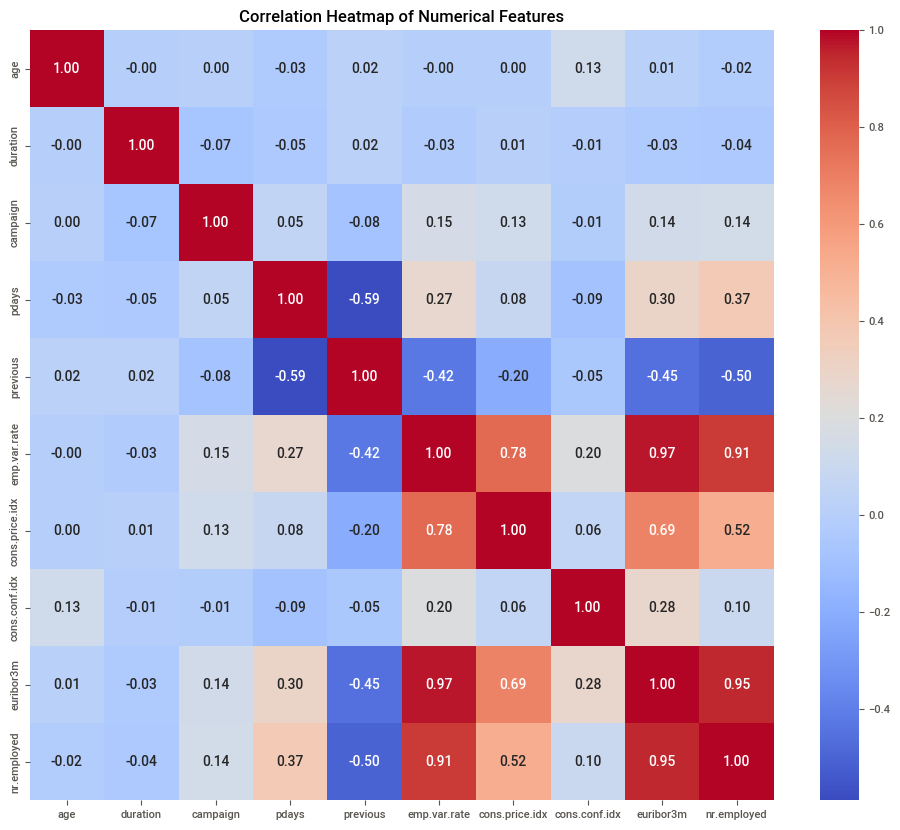

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for numerical columns
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Data preprocessing

### Subtask:
Preprocess the data for the classification algorithms. This may include handling categorical variables, scaling numerical features, and splitting the data into training and testing sets.


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include='number').columns.tolist()

# Remove the target variable 'y' from categorical columns if it exists
if 'y' in categorical_cols:
    categorical_cols.remove('y')

# Separate features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Create a preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing to the features
X_processed = preprocessing_pipeline.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (32950, 63)
Shape of X_test: (8238, 63)
Shape of y_train: (32950,)
Shape of y_test: (8238,)


## Model training

### Subtask:
Train Decision Tree, Random Forest, kNN, and XGBoost models on the training data.


**Reasoning**:
Import the necessary classification models and train them using the preprocessed training data.



**Reasoning**:
The error indicates that the target variable `y` is not in a numerical format required by XGBoost. Convert the target variable to numerical format.



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert the target variable 'y' to numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train the classifiers with the encoded target variable
dt_model.fit(X_train, y_train_encoded)
rf_model.fit(X_train, y_train_encoded)
knn_model.fit(X_train, y_train_encoded)
xgb_model.fit(X_train, y_train_encoded)

print("Decision Tree model trained.")
print("Random Forest model trained.")
print("kNN model trained.")
print("XGBoost model trained.")

Decision Tree model trained.
Random Forest model trained.
kNN model trained.
XGBoost model trained.


## Model evaluation

### Subtask:
Evaluate the performance of each model using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test set
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics for each model
dt_accuracy = accuracy_score(y_test_encoded, dt_pred)
dt_precision = precision_score(y_test_encoded, dt_pred)
dt_recall = recall_score(y_test_encoded, dt_pred)
dt_f1 = f1_score(y_test_encoded, dt_pred)

rf_accuracy = accuracy_score(y_test_encoded, rf_pred)
rf_precision = precision_score(y_test_encoded, rf_pred)
rf_recall = recall_score(y_test_encoded, rf_pred)
rf_f1 = f1_score(y_test_encoded, rf_pred)

knn_accuracy = accuracy_score(y_test_encoded, knn_pred)
knn_precision = precision_score(y_test_encoded, knn_pred)
knn_recall = recall_score(y_test_encoded, knn_pred)
knn_f1 = f1_score(y_test_encoded, knn_pred)

xgb_accuracy = accuracy_score(y_test_encoded, xgb_pred)
xgb_precision = precision_score(y_test_encoded, xgb_pred)
xgb_recall = recall_score(y_test_encoded, xgb_pred)
xgb_f1 = f1_score(y_test_encoded, xgb_pred)

# Store the metrics in a dictionary
performance_metrics = {
    'Decision Tree': {
        'Accuracy': dt_accuracy,
        'Precision': dt_precision,
        'Recall': dt_recall,
        'F1-score': dt_f1
    },
    'Random Forest': {
        'Accuracy': rf_accuracy,
        'Precision': rf_precision,
        'Recall': rf_recall,
        'F1-score': rf_f1
    },
    'kNN': {
        'Accuracy': knn_accuracy,
        'Precision': knn_precision,
        'Recall': knn_recall,
        'F1-score': knn_f1
    },
    'XGBoost': {
        'Accuracy': xgb_accuracy,
        'Precision': xgb_precision,
        'Recall': xgb_recall,
        'F1-score': xgb_f1
    }
}

# Print the metrics
for model, metrics in performance_metrics.items():
    print(f"--- {model} ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("-" * (len(model) + 6))

--- Decision Tree ---
Accuracy: 0.8871
Precision: 0.5025
Recall: 0.5316
F1-score: 0.5166
-------------------
--- Random Forest ---
Accuracy: 0.9102
Precision: 0.6516
Recall: 0.4481
F1-score: 0.5311
-------------------
--- kNN ---
Accuracy: 0.9007
Precision: 0.5827
Recall: 0.4406
F1-score: 0.5018
---------
--- XGBoost ---
Accuracy: 0.9154
Precision: 0.6466
Recall: 0.5615
F1-score: 0.6010
-------------


## Model comparison

### Subtask:
Compare the performance of the four algorithms and identify the best-performing model.


**Reasoning**:
Analyze the performance metrics to identify the best-performing model based on F1-score, as it is a good measure for imbalanced datasets like this.



In [ ]:
import pandas as pd

# Convert the performance_metrics dictionary to a pandas DataFrame for easier comparison
performance_df = pd.DataFrame(performance_metrics).T

# Sort by F1-score in descending order to find the best performing model
performance_df_sorted = performance_df.sort_values(by='F1-score', ascending=False)

print("Model Performance Comparison:")
display(performance_df_sorted)

# Identify the best model based on the highest F1-score
best_model_name = performance_df_sorted.index[0]
best_model_f1 = performance_df_sorted['F1-score'][0]

print(f"\nThe best performing model based on F1-score is: {best_model_name} with an F1-score of {best_model_f1:.4f}")

Model Performance Comparison:


,Accuracy,Precision,Recall,F1-score
XGBoost,0.915392,0.646552,0.561497,0.601030
Random Forest,0.910172,0.651633,0.448128,0.531052
Decision Tree,0.887109,0.502528,0.531551,0.516632
kNN,0.900704,0.582744,0.440642,0.501827



The best performing model based on F1-score is: XGBoost with an F1-score of 0.6010


/tmp/ipython-input-12-230686206.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_model_f1 = performance_df_sorted['F1-score'][0]


## Prediction

### Subtask:
Use the best-performing model to predict the target variable for two randomly selected records from the dataset.


**Reasoning**:
Randomly select two records from the original dataframe, preprocess them using the established pipeline, and predict the target variable using the best-performing model (XGBoost).



In [ ]:
import numpy as np

# Randomly select two indices
random_indices = np.random.choice(df.index, size=2, replace=False)

# Extract the two records from the original dataframe
two_records = df.loc[random_indices]

# Apply the preprocessing pipeline to the two records
two_records_processed = preprocessing_pipeline.transform(two_records.drop('y', axis=1))

# Use the best performing model (xgb_model) to predict the target
predicted_target_encoded = xgb_model.predict(two_records_processed)

# Inverse transform the predicted target to original labels
predicted_target = label_encoder.inverse_transform(predicted_target_encoded)

print("Original Records:")
display(two_records)
print("\nPredicted Target Values:")
print(predicted_target)

Original Records:


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
18197,44,admin.,married,university.degree,no,yes,no,cellular,jul,wed,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
26405,32,technician,single,university.degree,no,unknown,unknown,cellular,nov,thu,...,1,999,1,failure,-0.1,93.200,-42.0,4.076,5195.8,no



Predicted Target Values:
['no' 'no']


## Summary:

### Data Analysis Key Findings

*   The dataset was successfully loaded from a nested zip file structure.
*   Initial EDA using `sweetviz` was attempted but failed due to a dependency issue, while the correlation heatmap of numerical features was successfully generated.
*   The data was preprocessed by applying one-hot encoding to categorical features and standardization to numerical features.
*   The dataset was split into training (80%) and testing (20%) sets.
*   Four classification models (Decision Tree, Random Forest, kNN, and XGBoost) were trained on the preprocessed training data.
*   The target variable 'y' was encoded numerically (0 and 1) before model training.
*   The models were evaluated on the test set using Accuracy, Precision, Recall, and F1-score.
    *   Decision Tree: Accuracy: 0.8871, Precision: 0.5025, Recall: 0.5316, F1-score: 0.5166
    *   Random Forest: Accuracy: 0.9102, Precision: 0.6516, Recall: 0.4481, F1-score: 0.5311
    *   kNN: Accuracy: 0.9007, Precision: 0.5827, Recall: 0.4406, F1-score: 0.5018
    *   XGBoost: Accuracy: 0.9154, Precision: 0.6466, Recall: 0.5615, F1-score: 0.6010
*   Based on the F1-score, XGBoost was identified as the best-performing model.
*   The best model (XGBoost) was used to predict the target variable for two randomly selected, preprocessed records from the original dataset.

### Insights or Next Steps

*   The dependency issue with `sweetviz` should be investigated and resolved to enable more comprehensive EDA in the future.
*   Further model tuning and hyperparameter optimization, especially for XGBoost, could potentially improve performance metrics.


Descriptive Statistics for Numerical Features:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000



Value Counts for Categorical Features:

Value Counts for 'job':


,count
job,
admin.,10422
blue-collar,9254
technician,6743
services,3969
management,2924
retired,1720
entrepreneur,1456
self-employed,1421
housemaid,1060



Value Counts for 'marital':


,count
marital,
married,24928
single,11568
divorced,4612
unknown,80



Value Counts for 'education':


,count
education,
university.degree,12168
high.school,9515
basic.9y,6045
professional.course,5243
basic.4y,4176
basic.6y,2292
unknown,1731
illiterate,18



Value Counts for 'default':


,count
default,
no,32588
unknown,8597
yes,3



Value Counts for 'housing':


,count
housing,
yes,21576
no,18622
unknown,990



Value Counts for 'loan':


,count
loan,
no,33950
yes,6248
unknown,990



Value Counts for 'contact':


,count
contact,
cellular,26144
telephone,15044



Value Counts for 'month':


,count
month,
may,13769
jul,7174
aug,6178
jun,5318
nov,4101
apr,2632
oct,718
sep,570
mar,546



Value Counts for 'day_of_week':


,count
day_of_week,
thu,8623
mon,8514
wed,8134
tue,8090
fri,7827



Value Counts for 'poutcome':


,count
poutcome,
nonexistent,35563
failure,4252
success,1373



Value Counts for 'y':


,count
y,
no,36548
yes,4640


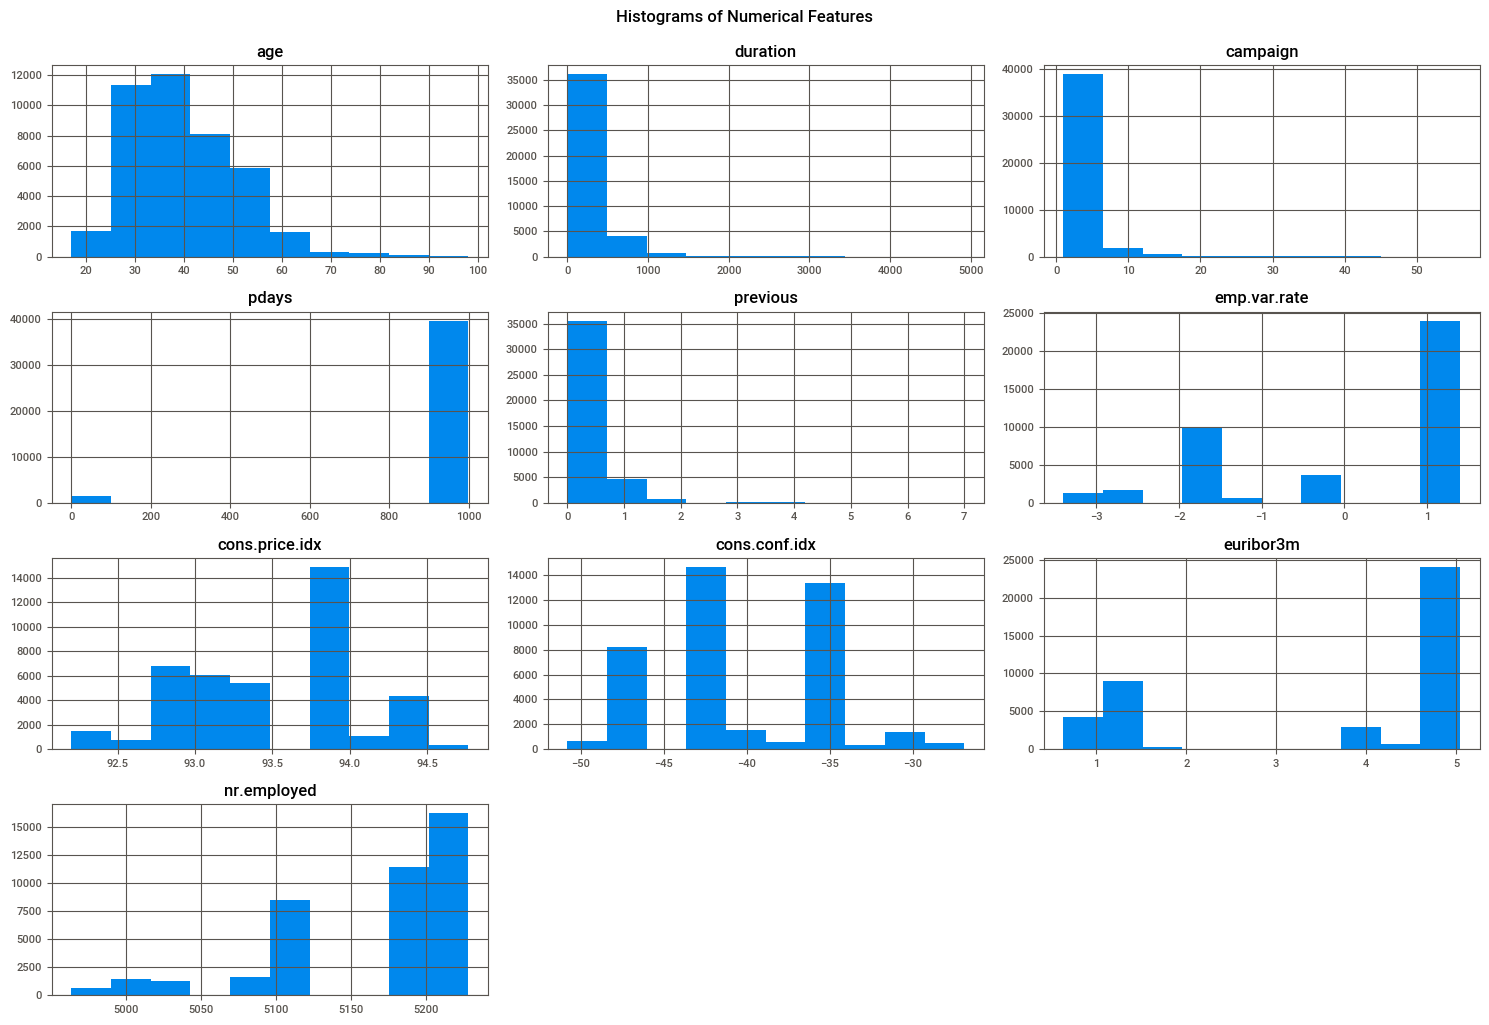

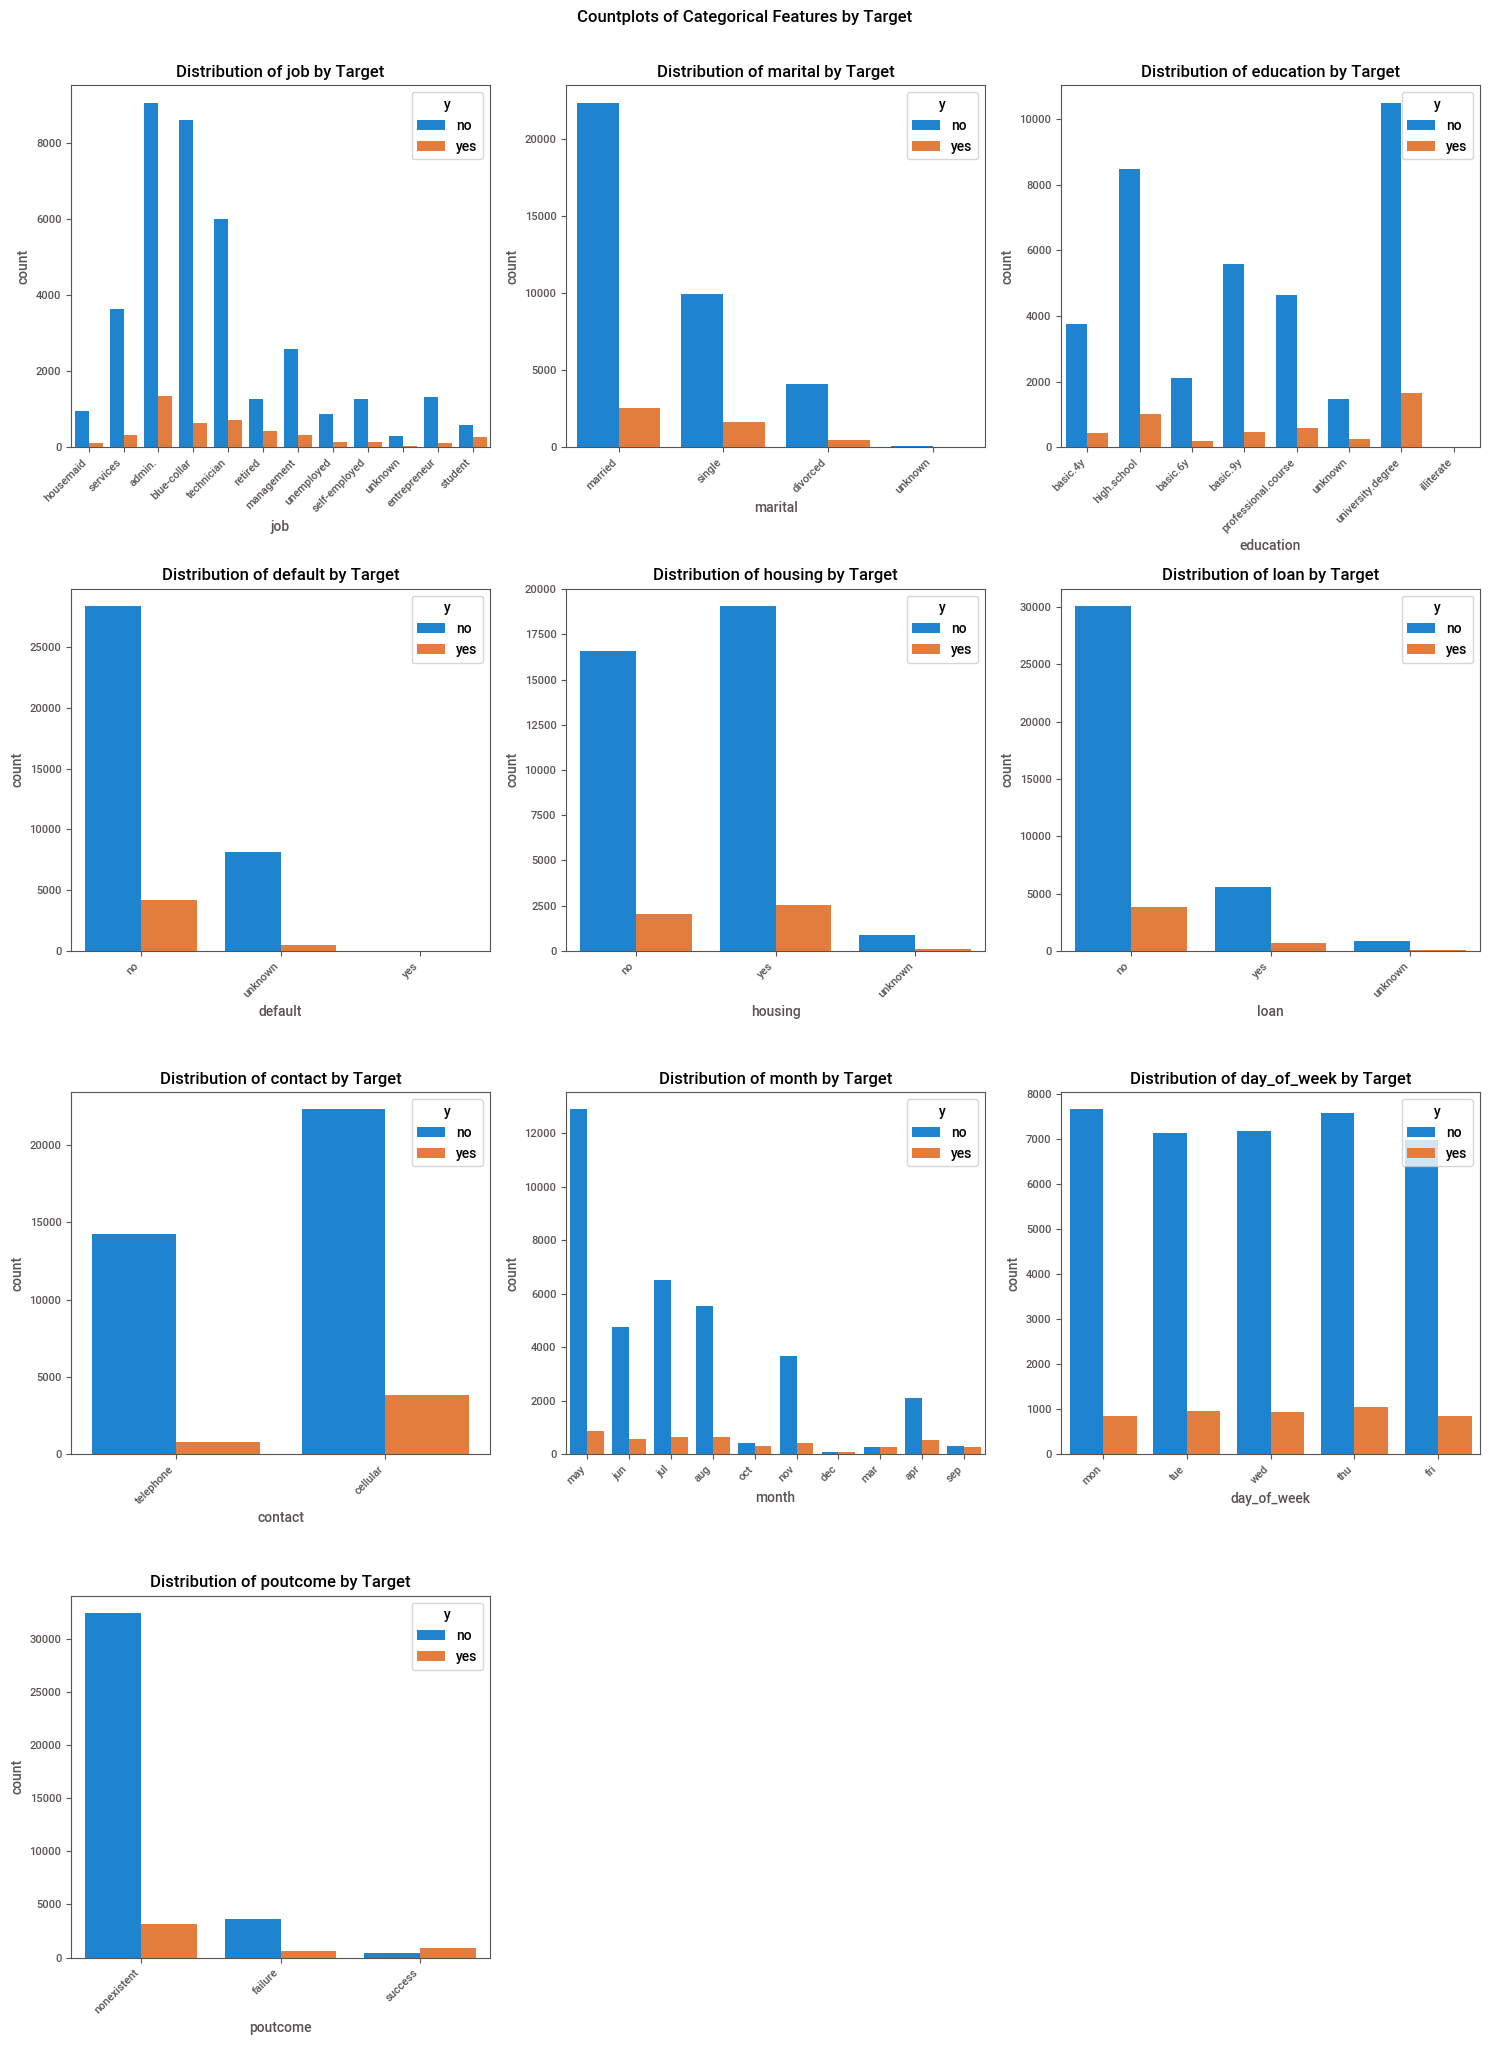

from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['duration'].plot(kind='hist', bins=20, title='duration')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['campaign'].plot(kind='hist', bins=20, title='campaign')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['pdays'].plot(kind='hist', bins=20, title='pdays')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='age', y='duration', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='duration', y='campaign', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='campaign', y='pdays', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='pdays', y='previous', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['duration'].plot(kind='line', figsize=(8, 4), title='duration')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['campaign'].plot(kind='line', figsize=(8, 4), title='campaign')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['pdays'].plot(kind='line', figsize=(8, 4), title='pdays')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='age', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='duration', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='campaign', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='pdays', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# Display descriptive statistics for numerical features
print("Descriptive Statistics for Numerical Features:")
display(df.select_dtypes(include=['number']).describe())

# Display value counts for categorical features
print("\nValue Counts for Categorical Features:")
for col in df.select_dtypes(include='object').columns:
    print(f"\nValue Counts for '{col}':")
    display(df[col].value_counts())

# Visualize the distribution of numerical features using histograms
df.select_dtypes(include=['number']).hist(figsize=(15, 10))
plt.tight_layout()
plt.suptitle("Histograms of Numerical Features", y=1.02)
plt.show()

# Visualize the distribution of categorical features using countplots
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'y' in categorical_cols:
    categorical_cols.remove('y') # Exclude the target variable for countplots

n_categorical_cols = len(categorical_cols)
n_cols = 3
n_rows = (n_categorical_cols + n_cols - 1) // n_cols # Calculate the number of rows needed

plt.figure(figsize=(15, n_rows * 5)) # Adjust figure size based on number of rows
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col, hue='y')
    plt.title(f'Distribution of {col} by Target')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.suptitle("Countplots of Categorical Features by Target", y=1.02)
plt.show()

## Numerical feature visualization

### Subtask:
Generate box plots for numerical features to visualize their distribution and identify outliers.


**Reasoning**:
Generate box plots for numerical features to visualize their distribution and identify outliers.



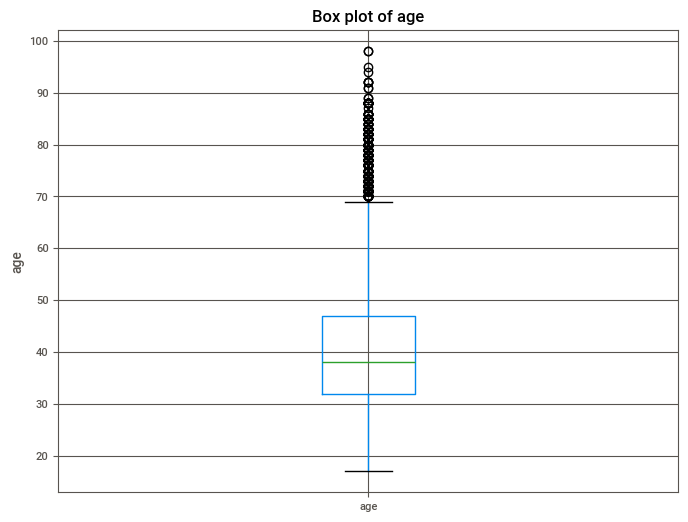

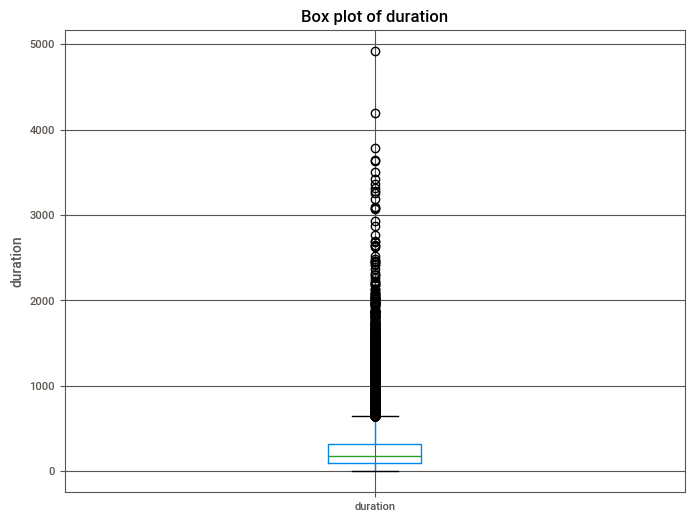

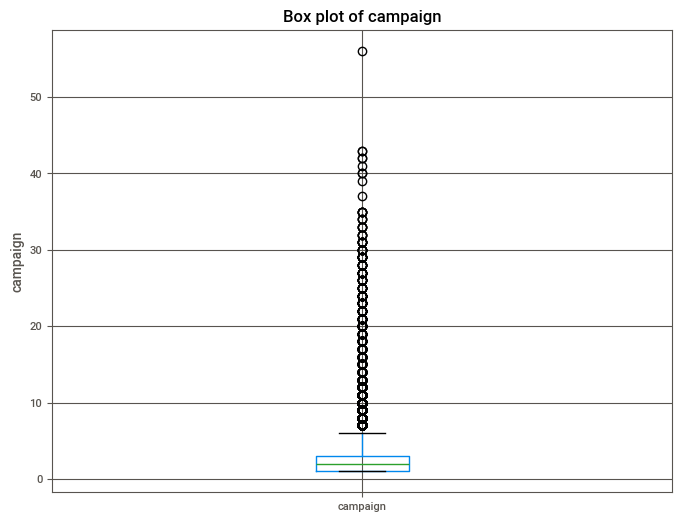

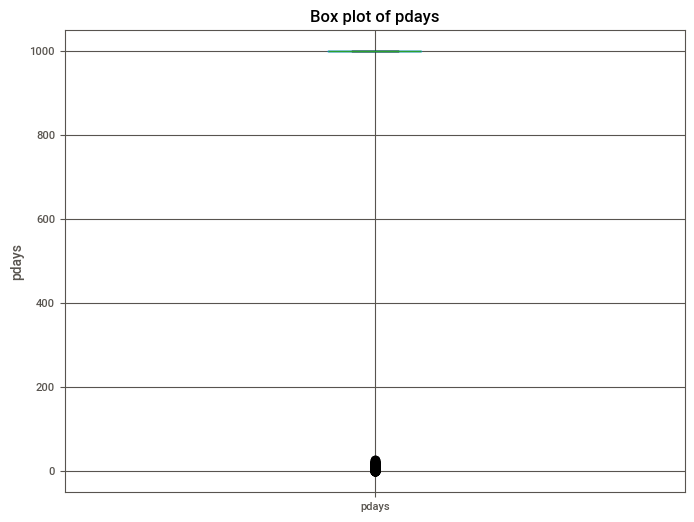

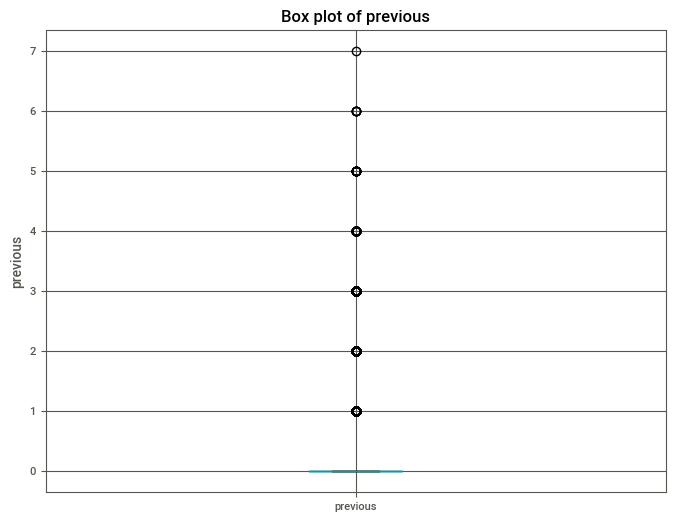

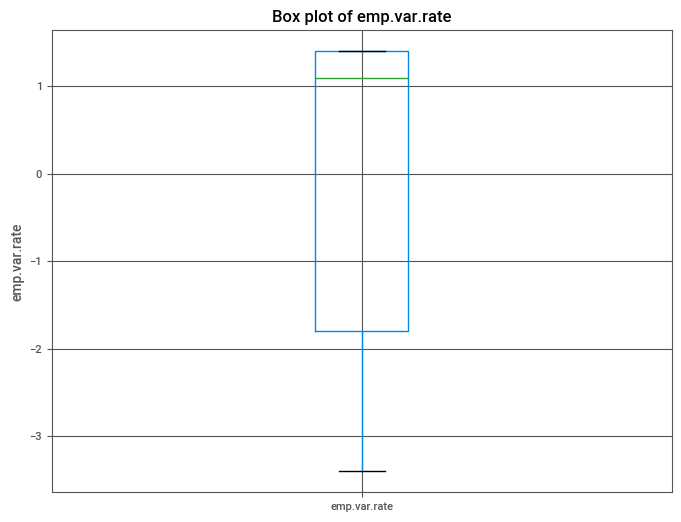

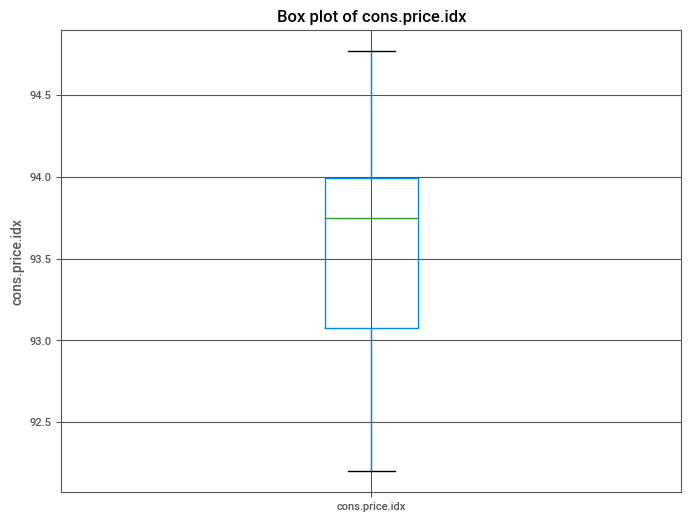

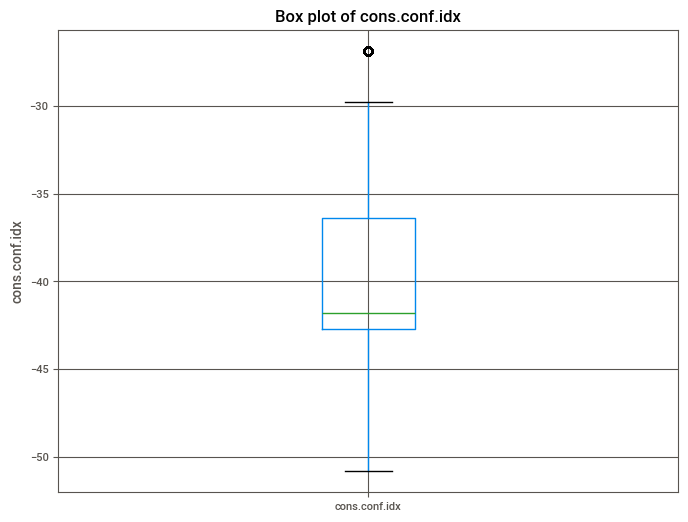

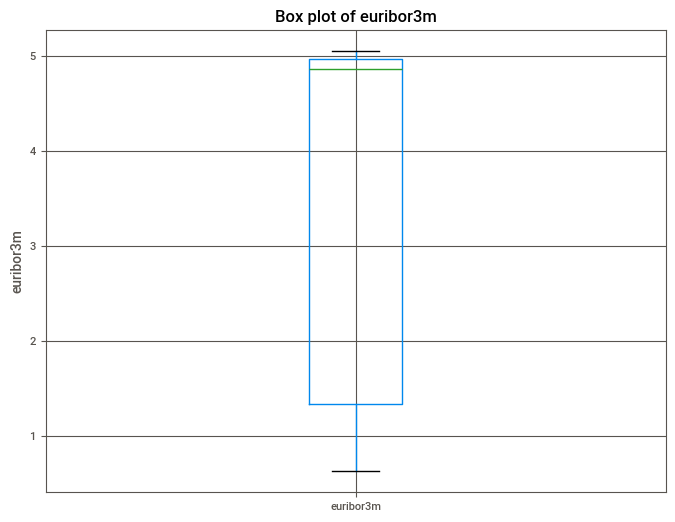

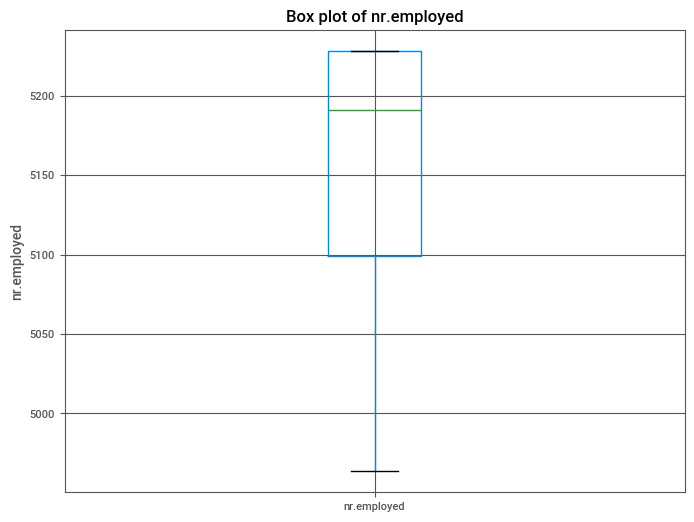

In [ ]:
import matplotlib.pyplot as plt

# Select only the numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Create box plots for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=col)
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.show()

## Categorical feature visualization

### Subtask:
Generate more detailed visualizations for categorical features, potentially focusing on specific categories or using different plot types if necessary, based on the initial countplots.


**Reasoning**:
Generate detailed countplots for categorical features, visualizing their distribution with respect to the target variable 'y', to understand the relationship between each category and the target outcome.



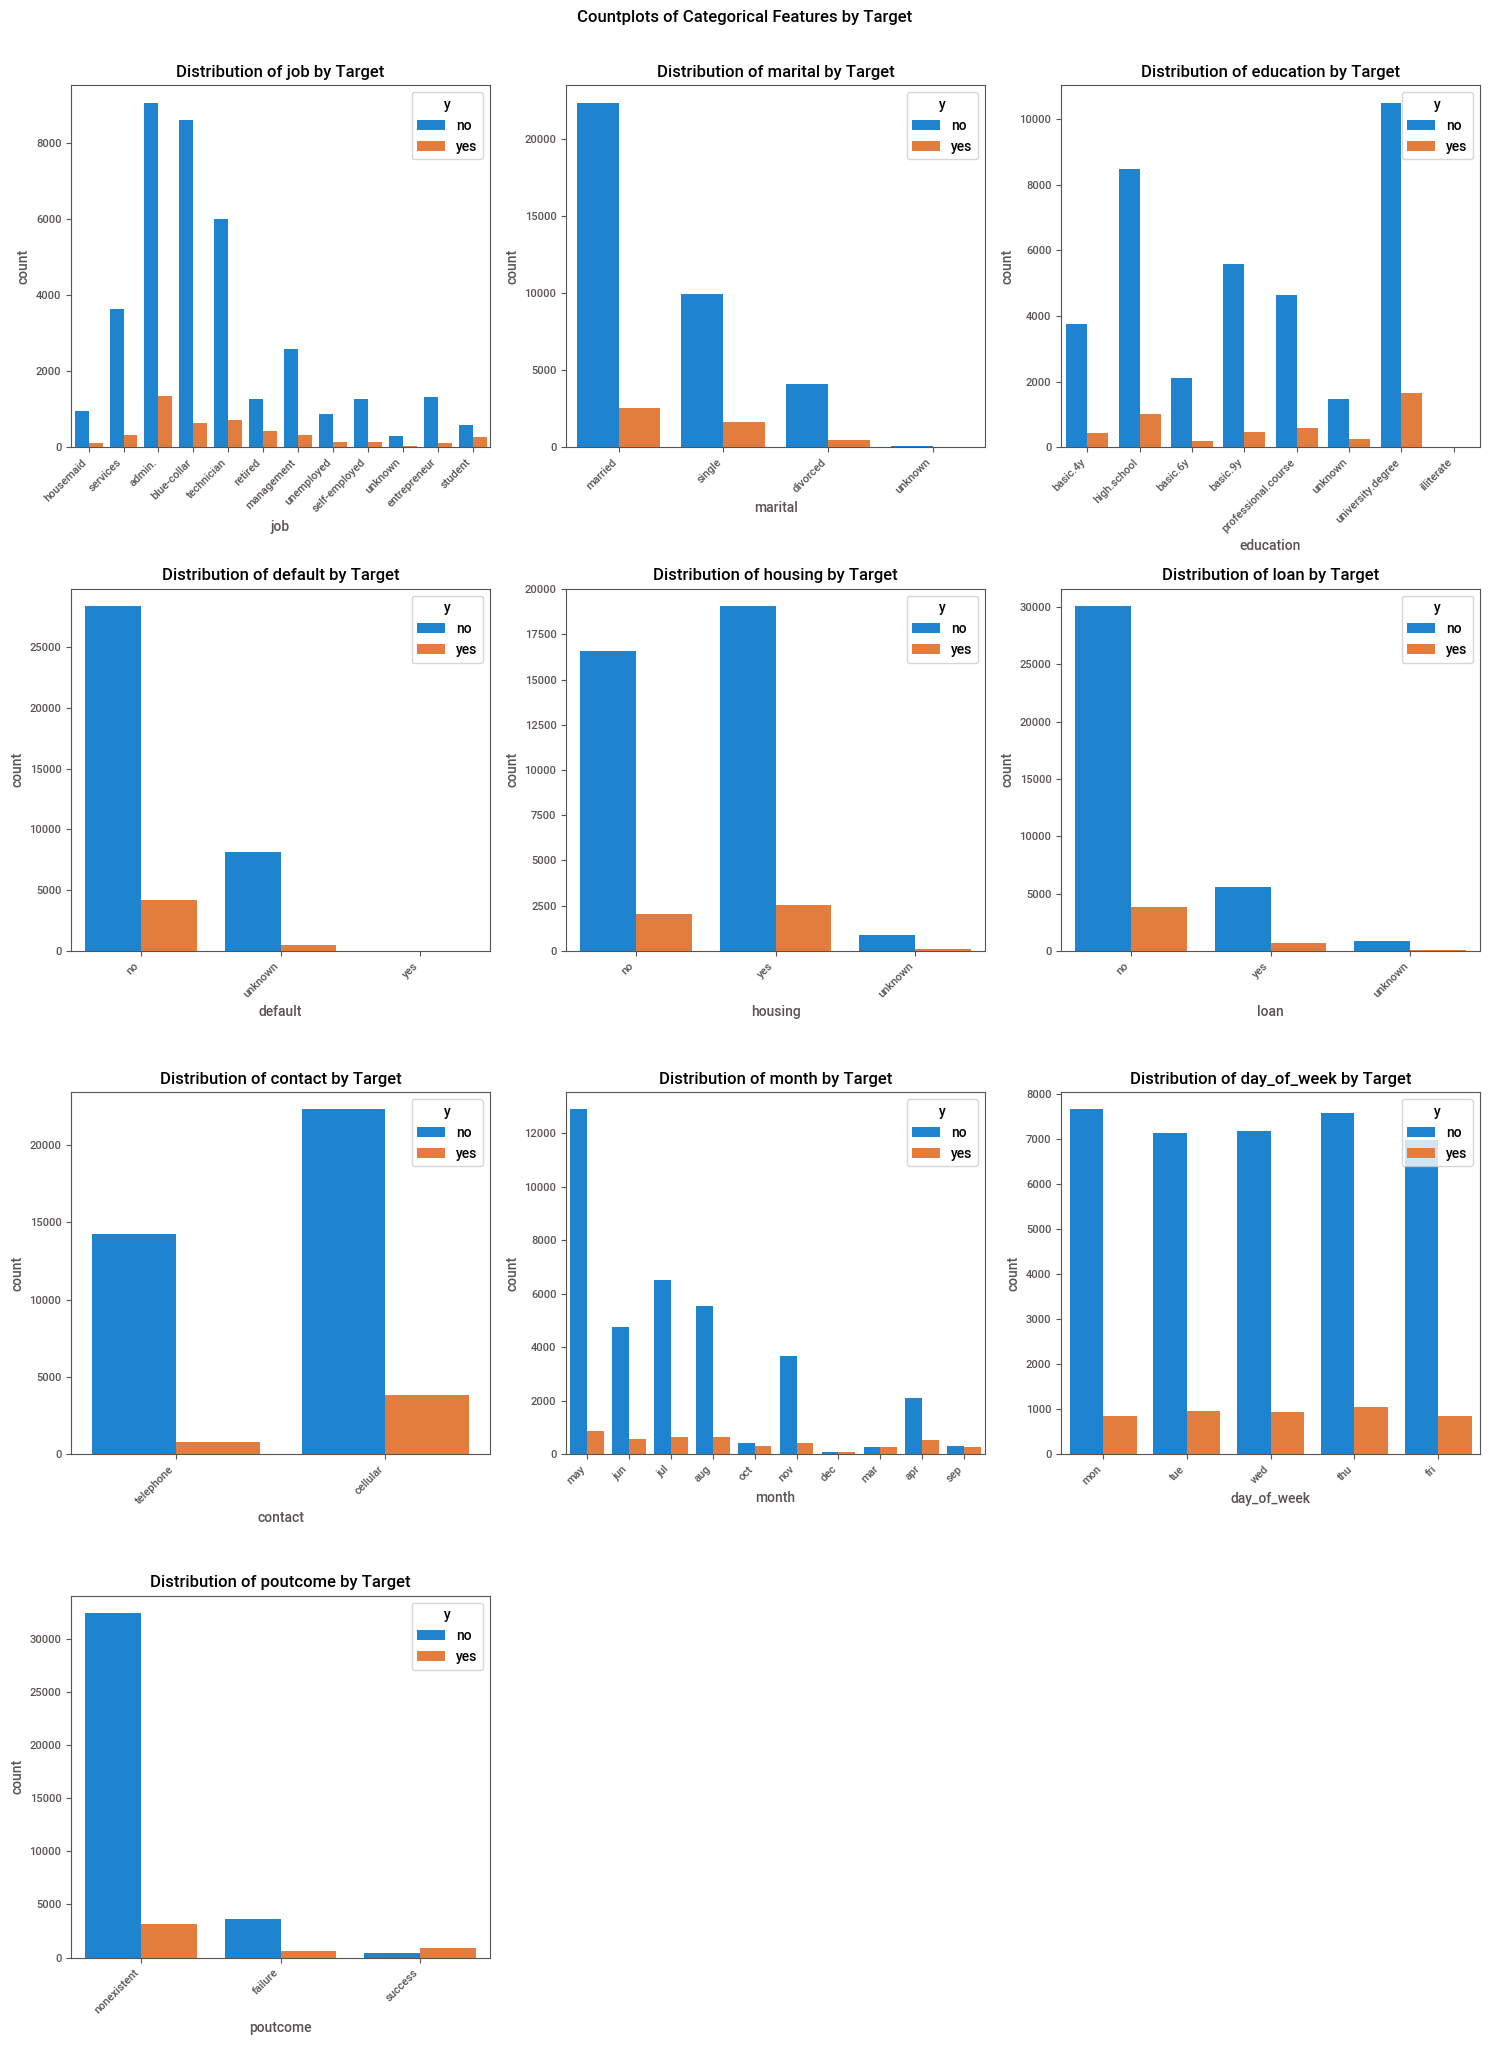

In [ ]:
# Visualize the distribution of categorical features using countplots
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'y' in categorical_cols:
    categorical_cols.remove('y') # Exclude the target variable for countplots

n_categorical_cols = len(categorical_cols)
n_cols = 3
n_rows = (n_categorical_cols + n_cols - 1) // n_cols # Calculate the number of rows needed

plt.figure(figsize=(15, n_rows * 5)) # Adjust figure size based on number of rows
for i, col in enumerate(categorical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col, hue='y')
    plt.title(f'Distribution of {col} by Target')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.suptitle("Countplots of Categorical Features by Target", y=1.02)
plt.show()

## Relationship visualization

### Subtask:
Visualize the relationship between key features (both numerical and categorical) and the target variable 'y'.


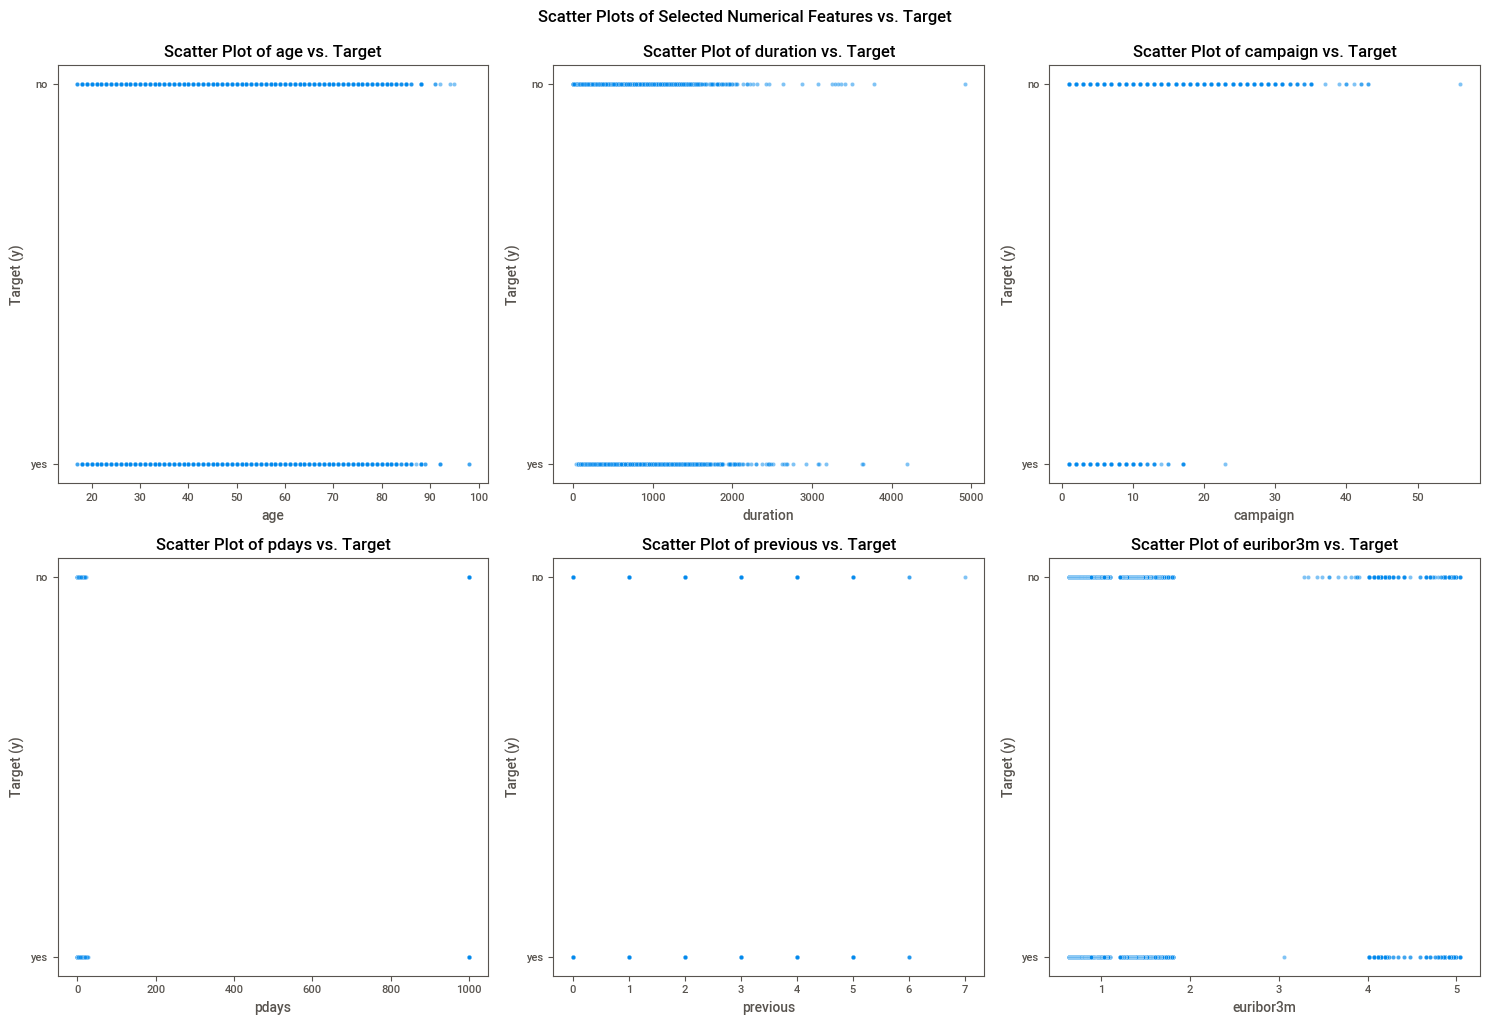

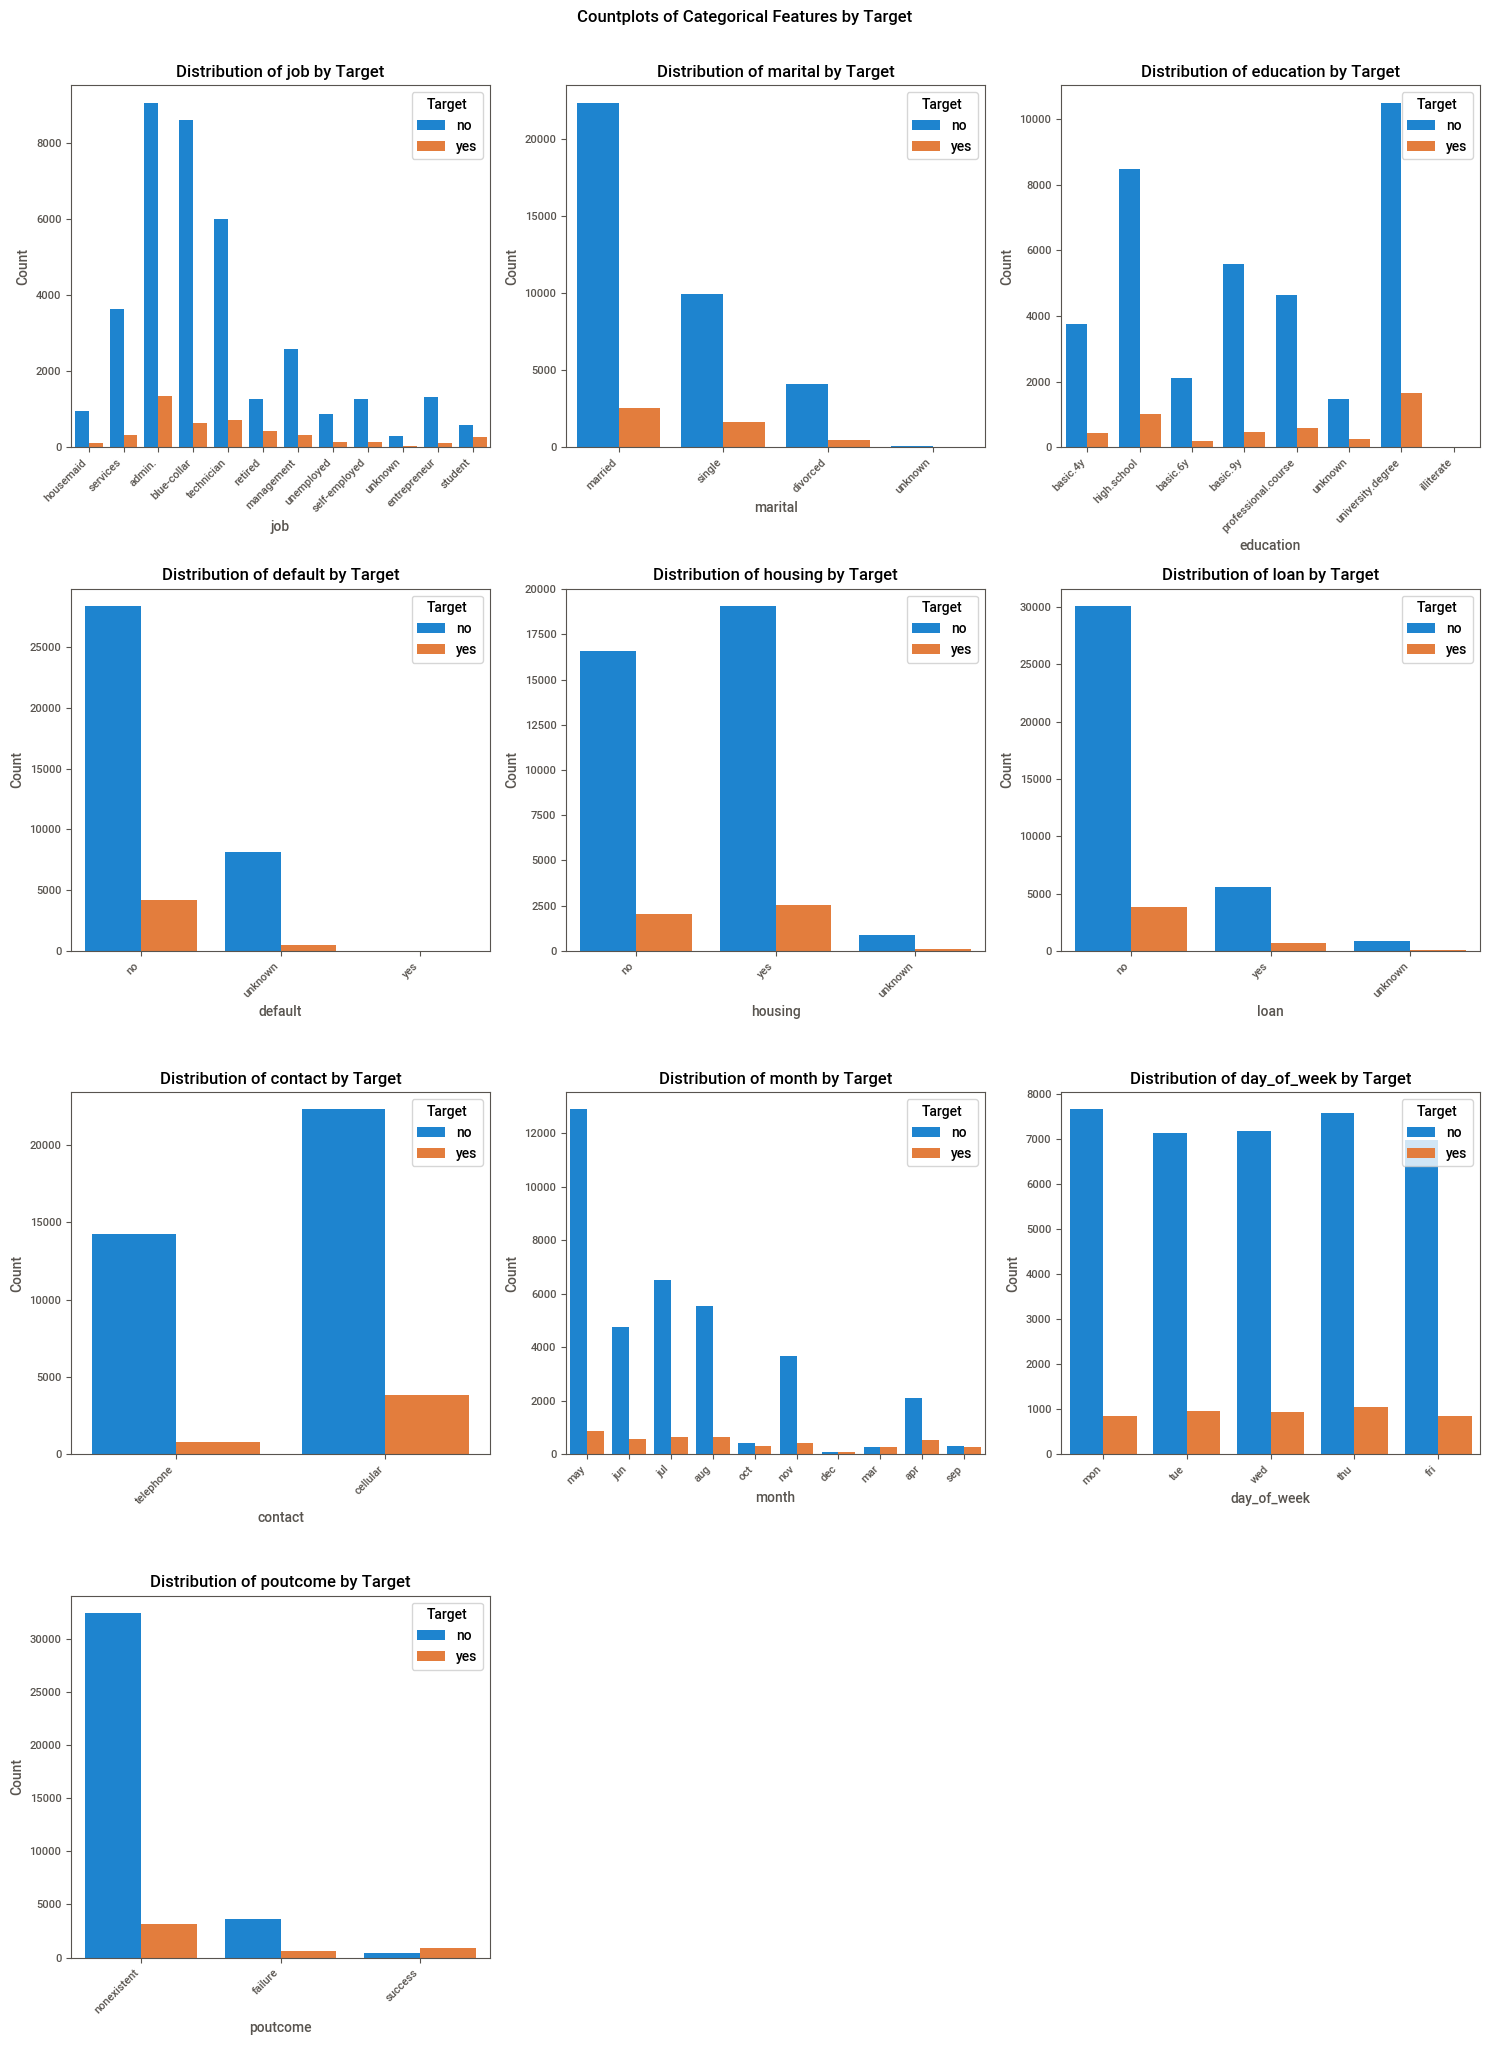

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selected numerical features for scatter plots based on potential interest from previous EDA
numerical_features_for_scatter = ['age', 'duration', 'campaign', 'pdays', 'previous', 'euribor3m']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features_for_scatter):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(data=df, x=col, y='y', alpha=0.5)
    plt.title(f'Scatter Plot of {col} vs. Target')
    plt.xlabel(col)
    plt.ylabel('Target (y)')

plt.tight_layout()
plt.suptitle("Scatter Plots of Selected Numerical Features vs. Target", y=1.02)
plt.show()

# Selected categorical features for grouped bar plots based on potential interest from previous EDA
categorical_features_for_barplot = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

n_categorical_features = len(categorical_features_for_barplot)
n_cols_barplot = 3
n_rows_barplot = (n_categorical_features + n_cols_barplot - 1) // n_cols_barplot

plt.figure(figsize=(15, n_rows_barplot * 5))
for i, col in enumerate(categorical_features_for_barplot):
    plt.subplot(n_rows_barplot, n_cols_barplot, i + 1)
    sns.countplot(data=df, x=col, hue='y')
    plt.title(f'Distribution of {col} by Target')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Target')

plt.tight_layout()
plt.suptitle("Countplots of Categorical Features by Target", y=1.02)
plt.show()

**Reasoning**:
Create a markdown cell with the outline for the business report based on the instructions.

